# Data visualization with GeoPandas

In [1]:
# Imports
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Read in Data
df = pd.read_csv('../data/cleaned_cdc.csv')

In [3]:
df.head()

,Unnamed: 0,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,StratificationCategoryId1,StratificationID1
0,0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,OVR,OVERALL
1,1,2011,AL,Alabama,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,GEN,MALE
2,2,2011,AL,Alabama,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,GEN,FEMALE
3,3,2011,AL,Alabama,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,EDU,EDUHS
4,4,2011,AL,Alabama,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,EDU,EDUHSGRAD


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df_ovr = df[df['StratificationID1'] == 'OVERALL']
df_ovr.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,OVR,OVERALL
28,2011,AL,Alabama,34.7,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,OVR,OVERALL
56,2011,AL,Alabama,43.8,7231.0,"(32.84057112200048, -86.63186076199969)",FV,FV1,Q018,OVR,OVERALL
84,2011,AL,Alabama,24.3,7135.0,"(32.84057112200048, -86.63186076199969)",FV,FV1,Q019,OVR,OVERALL
113,2011,AL,Alabama,42.4,7191.0,"(32.84057112200048, -86.63186076199969)",PA,PA1,Q043,OVR,OVERALL


In [6]:
df_ovr_ow = df_ovr[df_ovr['QuestionID'] == 'Q036']
df_ovr_ow.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,OVR,OVERALL
252,2012,AL,Alabama,33.0,8651.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,OVR,OVERALL
337,2013,AL,Alabama,32.4,6244.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,OVR,OVERALL
592,2014,AL,Alabama,33.5,8190.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,OVR,OVERALL
673,2011,AK,Alaska,27.4,3336.0,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q036,OVR,OVERALL


In [7]:
df_ovr_ow.shape

(306, 11)

In [8]:
df_avg = df_ovr_ow.groupby('LocationAbbr').mean()
df_avg.head()

,YearStart,Data_Value,Sample_Size
LocationAbbr,,,
AK,2013.5,28.733333,3690.000000
AL,2013.5,33.700000,7383.000000
AR,2013.5,34.350000,4841.833333
AZ,2013.5,27.366667,8027.333333
CA,2013.5,24.466667,11873.166667


In [9]:
geo_dict = df.set_index('LocationAbbr').to_dict()['GeoLocation']

In [10]:
geo_dict

{'AL': '(32.84057112200048, -86.63186076199969)',
 'AK': '(64.84507995700051, -147.72205903599973)',
 'AZ': '(34.865970280000454, -111.76381127699972)',
 'AR': '(34.74865012400045, -92.27449074299966)',
 'CA': '(37.63864012300047, -120.99999953799971)',
 'CT': '(41.56266102000046, -72.64984095199964)',
 'CO': '(38.843840757000464, -106.13361092099967)',
 'DE': '(39.008830667000495, -75.57774116799965)',
 'FL': '(28.932040377000476, -81.92896053899966)',
 'DC': '(38.89037138500049, -77.03196112699965)',
 'GA': '(32.83968109300048, -83.62758034599966)',
 'HI': '(21.304850435000446, -157.85774940299973)',
 'ID': '(43.682630005000476, -114.3637300419997)',
 'IL': '(40.48501028300046, -88.99771017799969)',
 'IN': '(39.766910452000445, -86.14996019399968)',
 'IA': '(42.46940091300047, -93.81649055599968)',
 'KS': '(38.34774030000045, -98.20078122699965)',
 'KY': '(37.645970271000465, -84.77497104799966)',
 'LA': '(31.31266064400046, -92.44568007099969)',
 'ME': '(45.254228894000505, -68.9850

In [11]:
df_avg['geo_loc'] = df_avg.index.map(geo_dict)

In [12]:
df_avg.head()

,YearStart,Data_Value,Sample_Size,geo_loc
LocationAbbr,,,,
AK,2013.5,28.733333,3690.000000,"(64.84507995700051, -147.72205903599973)"
AL,2013.5,33.700000,7383.000000,"(32.84057112200048, -86.63186076199969)"
AR,2013.5,34.350000,4841.833333,"(34.74865012400045, -92.27449074299966)"
AZ,2013.5,27.366667,8027.333333,"(34.865970280000454, -111.76381127699972)"
CA,2013.5,24.466667,11873.166667,"(37.63864012300047, -120.99999953799971)"


In [13]:
df_avg.drop(columns = ['YearStart', 'Sample_Size'], inplace = True)

In [14]:
df_avg.head()

,Data_Value,geo_loc
LocationAbbr,,
AK,28.733333,"(64.84507995700051, -147.72205903599973)"
AL,33.700000,"(32.84057112200048, -86.63186076199969)"
AR,34.350000,"(34.74865012400045, -92.27449074299966)"
AZ,27.366667,"(34.865970280000454, -111.76381127699972)"
CA,24.466667,"(37.63864012300047, -120.99999953799971)"


In [15]:
gf = gp.GeoDataFrame(df_avg)

In [16]:
import re
gf['geo_loc'] = gf['geo_loc'].str.replace(r'[()]', '')
lat = [float(gf['geo_loc'][i].split(',')[0]) for i in range(len(gf['geo_loc']))]
long = [float(gf['geo_loc'][i].split(',')[1]) for i in range(len(gf['geo_loc']))]
    
gf['lat'] = lat
gf['long'] = long

C:\Users\rmped\AppData\Local\Temp\ipykernel_6636\2230410607.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  gf['geo_loc'] = gf['geo_loc'].str.replace(r'[()]', '')


In [17]:
gf.head()

,Data_Value,geo_loc,lat,long
LocationAbbr,,,,
AK,28.733333,"64.84507995700051, -147.72205903599973",64.845080,-147.722059
AL,33.700000,"32.84057112200048, -86.63186076199969",32.840571,-86.631861
AR,34.350000,"34.74865012400045, -92.27449074299966",34.748650,-92.274491
AZ,27.366667,"34.865970280000454, -111.76381127699972",34.865970,-111.763811
CA,24.466667,"37.63864012300047, -120.99999953799971",37.638640,-121.000000


In [18]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(gf['long'], gf['lat'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gp.GeoDataFrame(gf, crs=crs, geometry=geometry)

C:\Users\rmped\miniconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [19]:
gdf.head()

,Data_Value,geo_loc,lat,long,geometry
LocationAbbr,,,,,
AK,28.733333,"64.84507995700051, -147.72205903599973",64.845080,-147.722059,POINT (-147.72206 64.84508)
AL,33.700000,"32.84057112200048, -86.63186076199969",32.840571,-86.631861,POINT (-86.63186 32.84057)
AR,34.350000,"34.74865012400045, -92.27449074299966",34.748650,-92.274491,POINT (-92.27449 34.74865)
AZ,27.366667,"34.865970280000454, -111.76381127699972",34.865970,-111.763811,POINT (-111.76381 34.86597)
CA,24.466667,"37.63864012300047, -120.99999953799971",37.638640,-121.000000,POINT (-121.00000 37.63864)


In [20]:
gdf_clean = gdf[['Data_Value', 'geometry']]

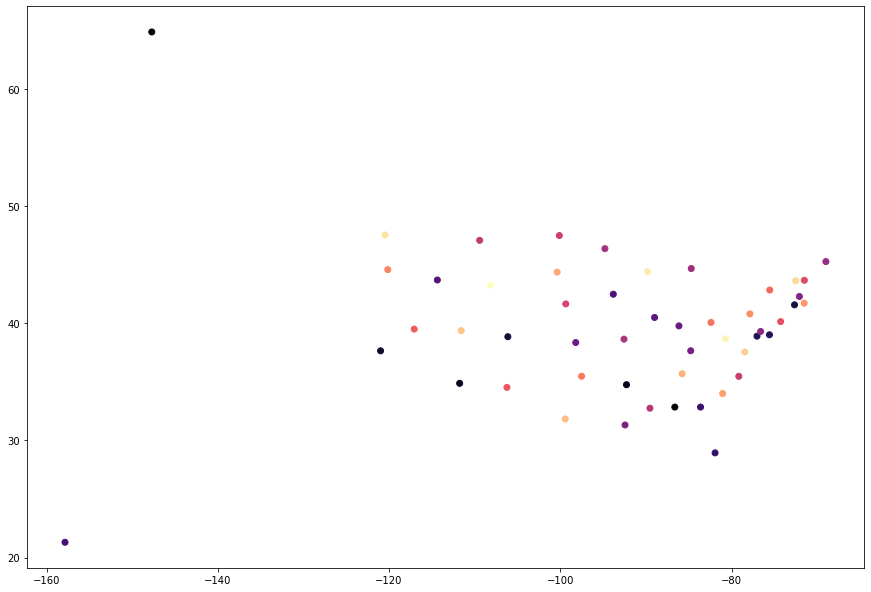

In [28]:
gdf_clean.plot(cmap = 'magma', figsize = (15,15));

In [30]:
from shapely.geometry import Polygon

In [32]:
us_shapes = pd.read_csv('../data/Formatted-CSV-US-Polygon.csv')
us_shapes.head()

,0,state,lat,long,country
0,1,AK,70.0187,-141.0205,US
1,2,AK,70.1292,-141.7291,US
2,3,AK,70.4515,-144.8163,US
3,4,AK,70.7471,-148.4583,US
4,5,AK,70.7923,-151.1609,US


In [33]:
us_shapes.drop(columns = ['0'], inplace = True)
us_shapes.head()

,state,lat,long,country
0,AK,70.0187,-141.0205,US
1,AK,70.1292,-141.7291,US
2,AK,70.4515,-144.8163,US
3,AK,70.7471,-148.4583,US
4,AK,70.7923,-151.1609,US


In [40]:
us_shapes['geo_tuple'] = [(xy) for xy in zip(us_shapes['lat'], us_shapes['long'])]

In [41]:
us_shapes.head()

,state,lat,long,country,geo_tuple
0,AK,70.0187,-141.0205,US,"(70.0187, -141.0205)"
1,AK,70.1292,-141.7291,US,"(70.1292, -141.7291)"
2,AK,70.4515,-144.8163,US,"(70.4515, -144.8163)"
3,AK,70.7471,-148.4583,US,"(70.7471, -148.4583)"
4,AK,70.7923,-151.1609,US,"(70.7923, -151.1609)"
